#Presentation 
###by Ayumu Ueda
###In this presentaion, I give you my analysis for the 2020 Congressional Race between Anna Eshoo and Rishi Kumar in Mountain View which belong to 18th Congressional Precinct. 
###First of all, I show the relationship between racial makeup and the percentage of the votes obtained by Anna, and then I make prediction model that can predict how much votes she can get in each precinct from the racial makeup.





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/drive/MyDrive/Volunteering/final.csv")
df_1 = df.copy()
df_4 = df.copy()

df_1["Total Population"]  -= df_1["White"]
df_1["Total Population"]  -= df_1["Other"]
df_1 = df_1.drop(["White","Other"], axis=1)

def funcA(x):
  x["Black_ratio"] = x["Black"] / x["Total Population"]
  x["Indian_ratio"] = x["Indian"] / x["Total Population"]
  x["Asian_ratio"] = x["Asian"] / x["Total Population"]
  x["Islander_ratio"] = x["Islander"] / x["Total Population"]
  x["Vacant_ratio"] = x["Vacant"] / x["Total house"]
  x["Vote_By_Mail_ratio_a"] = x["Vote By Mail_a"] / x["Total Votes_a"]
  x["Vote_By_Mail_ratio_r"] = x["Vote By Mail_r"] / x["Total Votes_r"]
  x["Vote for a rate"] = x["Total Votes_a"] / x["Total"]
  return x

def funcB(x):
  x["White_ratio"] = x["White"] / x["Total Population"]
  x["Black_ratio"] = x["Black"] / x["Total Population"]
  x["Indian_ratio"] = x["Indian"] / x["Total Population"]
  x["Asian_ratio"] = x["Asian"] / x["Total Population"]
  x["Islander_ratio"] = x["Islander"] / x["Total Population"]
  x["Other_ratio"] = x["Other"] / x["Total Population"]
  x["Vote for a rate"] = x["Total Votes_a"] / x["Total"]
funcA(df_1)
funcB(df_4)
df_1 = df_1.set_index("precinct")
df_4 = df_4.set_index("precinct")
df_1 = df_1.loc[:,"Black_ratio":]
df_4 = df_4.loc[:,"White_ratio":]

##Here is the explanation of each column
####Index = Precinct in 18th congressional district in Moutain View
####Black_ratio = the proportion of Black or African American alone in a precinct
####Indian_ratio = the proportion of American Indian and Alaska Native alone in a precinct 
####Asian_ratio = the proportion of Asian alone in a precinct
####Islander_ratio = the proportion of Native Hawaiian and Other Pacific Islander alone in a precinct
####Vote for a rate = the percentage of the votes obtained by Anna in a precinct.





##In this presentation, I consider only 4 alone above races(Black,Indian,Asian,Islander)

In [ ]:
df_1

,Black_ratio,Indian_ratio,Asian_ratio,Islander_ratio,Vacant_ratio,Vote_By_Mail_ratio_a,Vote_By_Mail_ratio_r,Vote for a rate
precinct,,,,,,,,
3410,0.036893,0.023301,0.939806,0.000000,0.055782,0.959401,0.930701,0.625076
2951,0.162835,0.080460,0.687739,0.068966,0.064516,0.942623,0.870690,0.512605
2018,0.072139,0.004975,0.915423,0.007463,0.051322,0.966667,0.825000,0.600000
3402,0.072139,0.004975,0.915423,0.007463,0.051322,0.964059,0.929782,0.696100
2013,0.033022,0.005025,0.958363,0.003589,0.049467,0.961388,0.928571,0.708940
2006,0.020349,0.002907,0.968023,0.008721,0.034375,0.977273,0.941176,0.721311
2125,0.020349,0.002907,0.968023,0.008721,0.034375,0.985714,0.950617,0.721649
3427,0.055556,0.023663,0.916667,0.004115,0.049393,0.946111,0.927393,0.642408
2305,0.038879,0.013722,0.942824,0.004574,0.052151,0.961936,0.940032,0.686802


##1.There is a correlation between Asian_ratio and Vote for a rate, it means that Asian people tend to support her.








                 Asian_ratio  Vote for a rate
Asian_ratio          1.00000          0.78348
Vote for a rate      0.78348          1.00000


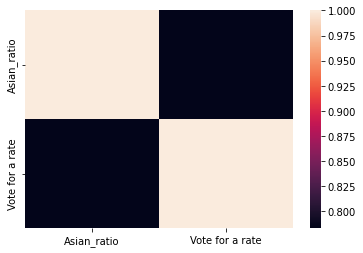

In [ ]:
corr = df_1[["Asian_ratio","Vote for a rate"]].corr()
print(corr)
sns.heatmap(corr)
plt.show()

##2.Indian_ratio have a negative correlation with Vote for a rate, therefore Anna tend not to be supported in the area where more American Indian people live.


                 Indian_ratio  Vote for a rate
Indian_ratio         1.000000        -0.654297
Vote for a rate     -0.654297         1.000000


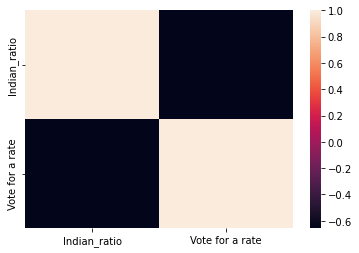

In [ ]:
corr = df_1[["Indian_ratio","Vote for a rate"]].corr()
print(corr)
sns.heatmap(corr)
plt.show()


##3.There is strong negative correlation between Black_ratio and Vote for a rate, it explain that Anna is struggle with collecting votes in precinct where  more Black or African American alone people live.


                 Black_ratio  Vote for a rate
Black_ratio         1.000000        -0.782564
Vote for a rate    -0.782564         1.000000


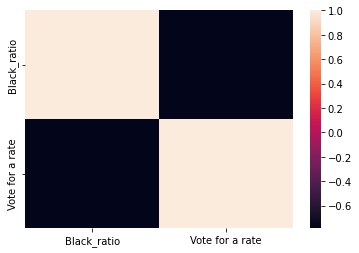

In [ ]:
corr = df_1[["Black_ratio","Vote for a rate"]].corr()
print(corr)
sns.heatmap(corr)
plt.show()

##4.There is a negative correlation between Islander_ratio and Vote for a rate, which shows that Anna tend to gather less votes in a precinct where more Native Hawaiian and Other Pacific Islander alone people live.



                 Islander_ratio  Vote for a rate
Islander_ratio         1.000000        -0.609724
Vote for a rate       -0.609724         1.000000


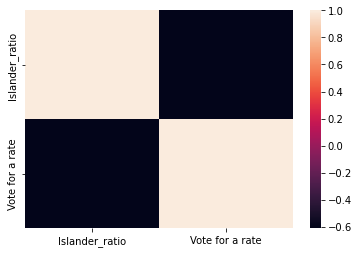

In [ ]:
corr = df_1[["Islander_ratio","Vote for a rate"]].corr()
print(corr)
sns.heatmap(corr)
plt.show()

##From 1,2,3,4, I can say that Anna have tendency to get less votes where less Asian alone live and more other races alone live.

##Let's take a look at precinct 2951 and 3409 as a good example shows that tendency

###below pictures shows that more Asian people live in 3409 precinct than 2951 precinct



In [ ]:
df_2 = df_1.iloc[:,:4].T 
df_2 = df_2[[3409, 2951]]
df_2 = df_2.T
label = list(df_2.columns)

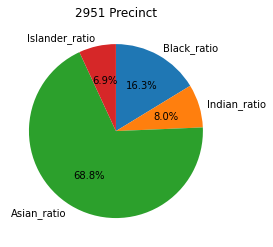

In [ ]:
x = df_2.T[2951].to_numpy()
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.title("2951 Precinct")
plt.show()

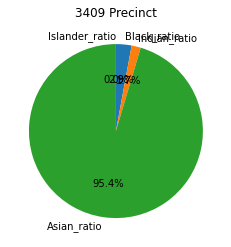

In [ ]:
x = df_2.T[3409].to_numpy()
plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")
plt.title("3409 Precinct")
plt.show()

##below picture shows that Anna gather more votes in precinct 3409 than 2951

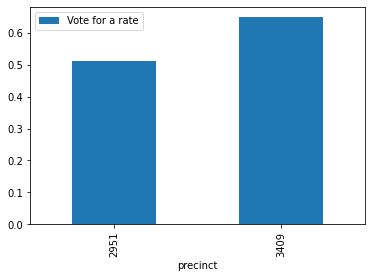

In [ ]:
df_3 = df_1.loc[[2951, 3409],["Vote for a rate"]]
df_3.plot.bar()

##From the above reason, I think there is some relationship between racial makeup and how much votes she can get.

##Prediction model by ElasticnetCV
##I use ElasticNetCV for model. I split 15 datasets into 12 train data and 3 test data.


In [ ]:
df_4

,White_ratio,Black_ratio,Indian_ratio,Asian_ratio,Islander_ratio,Other_ratio,Vote for a rate
precinct,,,,,,,
3410,0.506024,0.014307,0.009036,0.364458,0.000000,0.106175,0.625076
2951,0.503198,0.060412,0.029851,0.255153,0.025586,0.125800,0.512605
2018,0.684175,0.019782,0.001364,0.251023,0.002046,0.041610,0.600000
3402,0.684175,0.019782,0.001364,0.251023,0.002046,0.041610,0.696100
2013,0.519506,0.014954,0.002276,0.434005,0.001625,0.027633,0.708940
2006,0.481328,0.009682,0.001383,0.460581,0.004149,0.042877,0.721311
2125,0.481328,0.009682,0.001383,0.460581,0.004149,0.042877,0.721649
3427,0.454167,0.025000,0.010648,0.412500,0.001852,0.095833,0.642408
2305,0.526425,0.015625,0.005515,0.378906,0.001838,0.071691,0.686802


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
df_4 = df_4.drop(3402) #same census tract with 2018
X = df_4.iloc[:, :-1]
Y = df_4.iloc[:, -1:]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=67)

In [ ]:
clf = ElasticNetCV()
clf = clf.fit(train_x,train_y)
preds = clf.predict(test_x)
#rmse 0.074
#R2 0.06
#mae 0.057

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Loss is 0.04 in mae

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE
mae = MAE(test_y, preds)
mae

0.04015630526307745

##Here is Prediction and actual Score(Vote for a rate)

---



In [ ]:
test_y["Prediction"]  = preds
test_y

,Vote for a rate,Prediction
precinct,,
2018,0.600000,0.654248
3417,0.686951,0.647141
3410,0.625076,0.670035
2006,0.721311,0.699703
